# Clasificación de imágenes utilizando Clustering

En esta práctica se comprenderan los métodos de clusterización para la clasificación de imágenes sin etiquetar haciendo uso de técnicas de Aprendizaje Máquina No Supervisado. Como datos se utilizaran imágenes de CT de cabeza, cadera, pelvis y hombros, así como imágenes de ultrasonido de tumores de mama y cerebro fetal.

1. Abrir imágenes DICOM (downsamplig)
2. Analizar las imagenes de acuerdo a su histograma
3. Crear conjuntos de datos de entrenamiento y validación
4. Entrenar y validar método de clusterización KMeans utilizando SKLEARN

## 1. Abrir imágenes DICOM

Las imágenes DICOM (Digital Image and Comunications in Medicine) ees un protocolo estándar de comunicación entre sistemas de información y a la vez un formato de almacenamiento de imágenes médicas que aparece como solución a los problemas de interoperabilidad entre tipos de dispositivos.

El formato DICOM cuenta con objetos IOD (Information Object Definition), formados por la imagen y su información asociada. Cada fichero contiene, además de la imagen, información sobre el paciente (identificación demográfica y de identificación), el estudio en el que se encuadra la toma de la imagen, la serie a la que pertenece la imagen e información sobre la propia imagen.

__Pydicom:__ en un paquete de Python para trabajar con imágenes, reportes y onjetos de radioterapia en formato DICOM. Hace facil la lecturay exportación de este formato complejo de datos a estructuras comunes en ython para su manipulación, los cuales puedes ser re-escritos en formato DICOM.


In [1]:
!pip install pydicom
!pip install matplotlib
!pip install numpy
!pip install opencv-python
!pip install sklearn

## Leer imágenes DICOM y normalizarlas en arreglos numpy

In [3]:
import os
import pydicom
from matplotlib import pyplot as plt
import cv2
import numpy as np

def readImage(img_filename,img_path):
    
    img = cv2.imread((img_path + img_filename),0)
    
    #Normalizing image
    high = 255
    low = 0
    cmin = img.min()
    cmax = img.max()
    cscale = cmax - cmin
    scale = float(high - low) / cscale
    new_array = (img - cmin) * scale + low
    im = (new_array.clip(low, high) + 0.5).astype(np.uint8)
    
    # resize image
    dim = (128, 128)
    im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    
    return im

def readDICOMImage(img_filename,img_path):
    
    dicom_img = pydicom.dcmread(img_path + img_filename)
    
    #Normalizing image
    high = 255
    low = 0
    cmin = dicom_img.pixel_array.min()
    cmax = dicom_img.pixel_array.max()
    cscale = cmax - cmin
    scale = float(high - low) / cscale
    new_array = (dicom_img.pixel_array - cmin) * scale + low
    im = (new_array.clip(low, high) + 0.5).astype(np.uint8)
    
    # resize image
    dim = (128, 128)
    im = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
    
    return im


In [4]:
#CT images paths
head_ct_path = "Data/CT_images/Head/"
hip_ct_path = "Data/CT_images/Hip/"
pelvis_ct_path = "Data/CT_images/Pelvis/"
shoulder_ct_path = "Data/CT_images/Shoulder/"

#US images paths
breast_us_path = "Data/US_images/Breast/"
brain_us_path = "Data/US_images/Brain/"

#CT images filenames
head_ct_files = next(os.walk(head_ct_path))[2]
hip_ct_files = next(os.walk(hip_ct_path))[2]
pelvis_ct_files = next(os.walk(pelvis_ct_path))[2]
shoulder_ct_files = next(os.walk(shoulder_ct_path))[2]

#US images filenames
breast_us_files = next(os.walk(breast_us_path))[2]
brain_us_files = next(os.walk(brain_us_path))[2]

#CT Images
head_images = []
hip_images = []
pelvis_images = []
shoulder_images = []

#US Images
breast_images = []
brain_images = []

#Read all CT Images

for filename in head_ct_files:
    head_images.append(readDICOMImage(filename,head_ct_path))
print("Number of head images: " + str(len(head_images)))

for filename in hip_ct_files:
    hip_images.append(readDICOMImage(filename,hip_ct_path))
print("Number of hip images: " + str(len(hip_images)))

for filename in pelvis_ct_files:
    pelvis_images.append(readDICOMImage(filename,pelvis_ct_path))
print("Number of pelvis images: " + str(len(pelvis_images)))

for filename in shoulder_ct_files:
    shoulder_images.append(readDICOMImage(filename,shoulder_ct_path))
print("Number of shoulder images: " + str(len(shoulder_images)))

#Read all US Images

for filename in breast_us_files:
    breast_images.append(readImage(filename,breast_us_path))
print("Number of breast images: " + str(len(breast_images)))

for filename in brain_us_files:
    brain_images.append(readImage(filename,brain_us_path))
print("Number of brain images: " + str(len(brain_images)))



Number of head images: 308
Number of hip images: 714
Number of pelvis images: 206
Number of shoulder images: 910
Number of breast images: 1001
Number of brain images: 285


In [5]:
## Downsample data if balance of classes required
def downSampleData(images,n_data):

    shuffled_indices = np.arange(len(images))
    np.random.shuffle(shuffled_indices)
    idx = shuffled_indices[:n_data]
    less_images = np.array(images)[idx]
    
    return less_images
    
head_images = downSampleData(head_images,206)
print("Number of head images: " + str(len(head_images)))
hip_images = downSampleData(hip_images,206)
print("Number of hip images: " + str(len(hip_images)))
pelvis_images = downSampleData(pelvis_images,206)
print("Number of pelvis images: " + str(len(pelvis_images)))
shoulder_images = downSampleData(shoulder_images,206)
print("Number of shoulder images: " + str(len(shoulder_images)))
breast_images = downSampleData(breast_images,206)
print("Number of breast images: " + str(len(breast_images)))
brain_images = downSampleData(brain_images,206)
print("Number of brain images: " + str(len(brain_images)))

Number of head images: 206
Number of hip images: 206
Number of pelvis images: 206
Number of shoulder images: 206
Number of breast images: 206
Number of brain images: 206


## 2. Analizar imágenes de acuerdo a su histograma

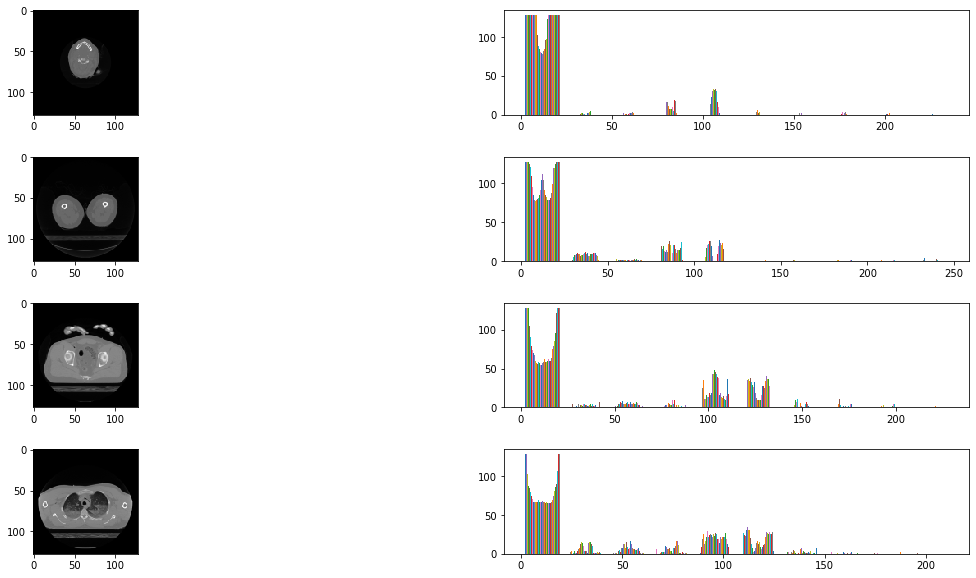

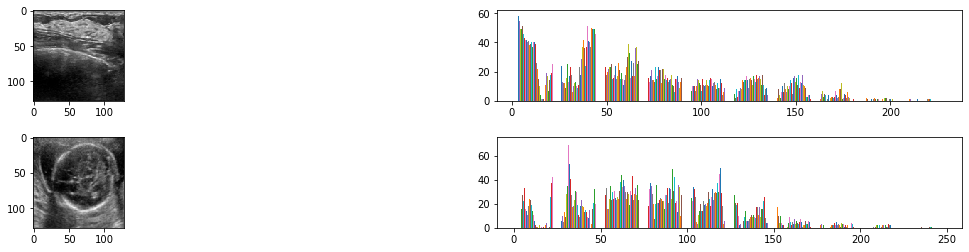

In [5]:
import random

#Get random image from each type

n = random.randint(0,len(head_images))
im_head = head_images[n]

n = random.randint(0,len(hip_images))
im_hip = hip_images[n]

n = random.randint(0,len(pelvis_images))
im_pelvis = pelvis_images[n]

n = random.randint(0,len(shoulder_images))
im_shoulder = shoulder_images[n]

n = random.randint(0,len(breast_images))
im_breast = breast_images[n]

n = random.randint(0,len(brain_images))
im_brain = brain_images[n]

#Displaying CT images and histograms
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(4, 2, 1)
ax.imshow(im_head, cmap="gray")

ax = fig.add_subplot(4, 2, 2)
_ = ax.hist(im_head) #calculating histogram

ax = fig.add_subplot(4, 2, 3)
ax.imshow(im_hip, cmap="gray")

ax = fig.add_subplot(4, 2, 4)
_ = ax.hist(im_hip) #calculating histogram

ax = fig.add_subplot(4, 2, 5)
ax.imshow(im_pelvis, cmap="gray")

ax = fig.add_subplot(4, 2, 6)
_ = ax.hist(im_pelvis) #calculating histogram

ax = fig.add_subplot(4, 2, 7)
ax.imshow(im_shoulder, cmap="gray")

ax = fig.add_subplot(4, 2, 8)
_ = ax.hist(im_shoulder) #calculating histogram


#Displaying US images and histograms
fig = plt.figure(figsize=(20,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 2, 1)
ax.imshow(im_breast, cmap="gray")

ax = fig.add_subplot(2, 2, 2)
_ = ax.hist(im_breast) #calculating histogram

ax = fig.add_subplot(2, 2, 3)
ax.imshow(im_brain, cmap="gray")

ax = fig.add_subplot(2, 2, 4)
_ = ax.hist(im_brain) #calculating histogram

## Obtener histogramas usando openCV

In [6]:
#cv2.calcHist is much faster than plt.hist
def getHistogram(im):
    hist = cv2.calcHist([im],[0],None,[256],[0,255])
    
    hist = cv2.normalize(hist,hist,0,1,cv2.NORM_MINMAX)
    
    return hist
    
head_histograms = []
hip_histograms = []
pelvis_histograms = []
shoulder_histograms = []
breast_histograms = []
brain_histograms = []

#Getting all histograms
for image in head_images:
    head_histograms.append(getHistogram(image))

for image in hip_images:
    hip_histograms.append(getHistogram(image))
        
for image in pelvis_images:
    pelvis_histograms.append(getHistogram(image))
        
for image in shoulder_images:
    shoulder_histograms.append(getHistogram(image))
        
for image in breast_images:
    breast_histograms.append(getHistogram(image))
        
for image in brain_images:
    brain_histograms.append(getHistogram(image))


Text(0.5, 1.0, 'brain')

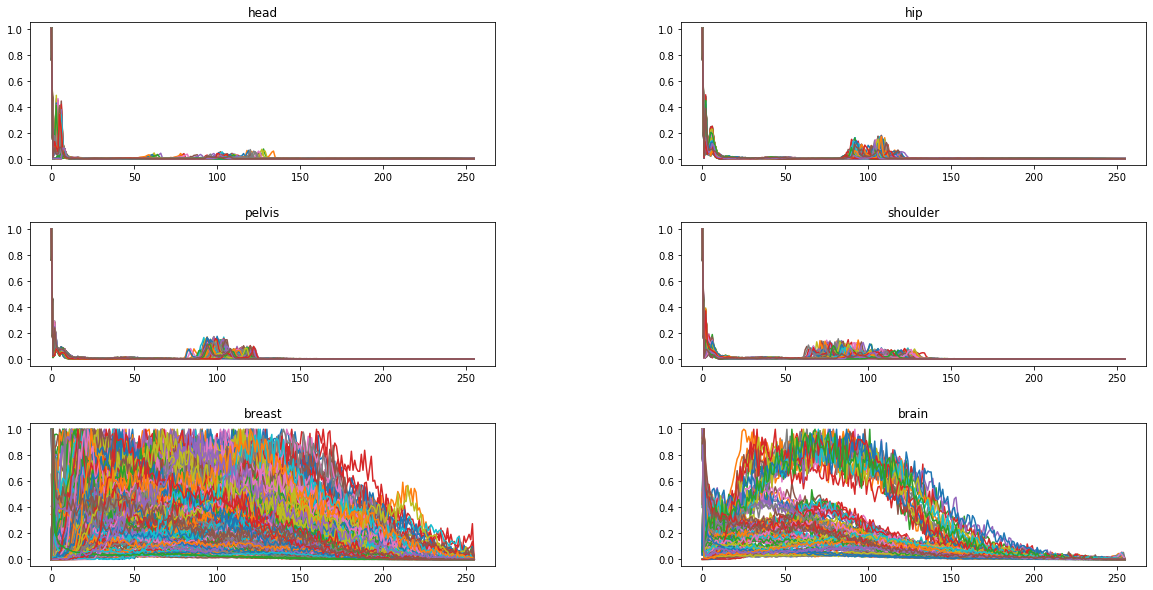

In [7]:
#Displaying US images and histograms
fig = plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(3, 2, 1)
for hist in head_histograms:
    ax.plot(hist)
ax.set_title("head")

ax = fig.add_subplot(3, 2, 2)
for hist in hip_histograms:
    ax.plot(hist)
ax.set_title("hip")

ax = fig.add_subplot(3, 2, 3)
for hist in pelvis_histograms:
    ax.plot(hist)
ax.set_title("pelvis")

ax = fig.add_subplot(3, 2, 4)
for hist in shoulder_histograms:
    ax.plot(hist)
ax.set_title("shoulder")

ax = fig.add_subplot(3, 2, 5)
for hist in breast_histograms:
    ax.plot(hist)
ax.set_title("breast")

ax = fig.add_subplot(3, 2, 6)
for hist in brain_histograms:
    ax.plot(hist)
ax.set_title("brain")
    

## 3. Crear conjuntos de datos de entrenamiento y validación

In [8]:
import math

#Extract train and validation data set according to train percentage
def extractTrainAndValData(histograms):
    
    train_p = 0.9
    
    shuffled_indices = np.arange(len(histograms))
    np.random.shuffle(shuffled_indices)
    train_idx = shuffled_indices[:math.ceil(len(histograms)*train_p)] 
    
    train_histograms = histograms[train_idx]
    val_histograms = np.delete(histograms,train_idx,axis=0)
    
    return train_histograms,val_histograms

#Converting histogram list to numpy array for processing
head_histograms = np.array(head_histograms)
hip_histograms = np.array(hip_histograms)
pelvis_histograms = np.array(pelvis_histograms)
shoulder_histograms = np.array(shoulder_histograms)
breast_histograms = np.array(breast_histograms)
brain_histograms = np.array(brain_histograms)

#Extract all training and validation data sets
[head_train_histograms, head_val_histograms] = extractTrainAndValData(head_histograms)
[hip_train_histograms, hip_val_histograms] = extractTrainAndValData(hip_histograms)
[pelvis_train_histograms, pelvis_val_histograms] = extractTrainAndValData(pelvis_histograms)
[shoulder_train_histograms, shoulder_val_histograms] = extractTrainAndValData(shoulder_histograms)
[breast_train_histograms, breast_val_histograms] = extractTrainAndValData(breast_histograms)
[brain_train_histograms, brain_val_histograms] = extractTrainAndValData(brain_histograms)


In [9]:
import sys

#Concatenating all arrays
train_histograms = np.concatenate((head_train_histograms,hip_train_histograms,pelvis_train_histograms,
                                   shoulder_train_histograms,breast_train_histograms,brain_train_histograms),axis=0)
val_histograms = np.concatenate((head_val_histograms,hip_val_histograms,pelvis_val_histograms,
                                   shoulder_val_histograms,breast_val_histograms,brain_val_histograms),axis=0)

head_train_class = np.full(len(head_train_histograms),0)
hip_train_class = np.full(len(hip_train_histograms),1)
pelvis_train_class = np.full(len(pelvis_train_histograms),2)
shoulder_train_class = np.full(len(shoulder_train_histograms),3)
breast_train_class = np.full(len(breast_train_histograms),4)
brain_train_class = np.full(len(brain_train_histograms),5)

train_class = np.concatenate((head_train_class,hip_train_class,pelvis_train_class,
                                   shoulder_train_class,breast_train_class,brain_train_class),axis=0)


#print(train_class)

#shuffle data sets for training
shuffled_indices = np.arange(len(train_histograms))
np.random.shuffle(shuffled_indices)
train_histograms = train_histograms[shuffled_indices]
train_class = train_class[shuffled_indices]

print(train_class)

#formating into required shape
train_histograms = np.squeeze(train_histograms)
val_histograms = np.squeeze(val_histograms)

print("Training data shape: " + str(train_histograms.shape))
print("Validation data shape: " + str(val_histograms.shape))

#np.set_printoptions(threshold=sys.maxsize)

[1 0 1 ... 2 4 4]
Training data shape: (1116, 256)
Validation data shape: (120, 256)


## 4. Entrenar y validar método de clusterización KMeans utilizando SKLEARN

### Paramettros de KMEANS:

__n_clusters:__
Número de clusters y centros
_default=8_ 

__init:__
Método de inicialización
{‘k-means++’, ‘random’} 
o ndarray de forma (n_clusters, n_features)
_default=’k-means++’_


__n_init:__
int
El numero de veces que el método empezara con diferentes centros, la salida sera la mejor opción
_default=10_

__max_iter:__
int
Número máximo de iteraciones para una sola corrida
_default=300_


__verbose:__
int
Información que arroja durante una corrida
_default=0_


__random_state:__
int, RandomState instance 
Determina en numero random para la inicialización de centros. Un entero para hacer deterministica la aleatoreidad
_default=None_

__algorithm:__
{“auto”, “full”, “elkan”}, default=”auto”
Algoritmo de Kmeans para usar: full=EM-style elkan=método acelerado (no sirve para casos con datos escasos)
_default='auto'_


### Atributos de KMEANS:

__cluster_centers_:__
ndarray de forma (n_clusters, n_features)
Las coordenadas de los centros de cada cluster


__labels_:__
ndarray de forma (n_samples,)
El cluster al que pertenece cada dato

__inertia_:__
float
La suma de los cuadrados de las distancias a el centro de su cluster

__n_iter_:__
int
Número de iteraciones de entrenamiento 

In [10]:
from sklearn.cluster import KMeans 

Kmeans = KMeans(n_clusters=6)
Kmeans.fit(train_histograms)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
#np.set_printoptions(threshold=3)

#Print Kmeans TRaining results
print(Kmeans.cluster_centers_)
print(Kmeans.labels_)
print(Kmeans.inertia_)
print(Kmeans.n_iter_)

[[ 9.6477586e-01  7.9816125e-02  1.6931909e-01 ...  5.7669007e-05
   1.8949853e-05  0.0000000e+00]
 [ 2.6141465e-02  2.8428787e-01  1.6729698e-01 ...  2.4367492e-03
   2.8771339e-03  0.0000000e+00]
 [ 3.2824457e-02  2.1640061e-01  2.1996211e-01 ...  4.1636168e-03
   5.4714284e-03  0.0000000e+00]
 [-4.1723251e-07  2.7505107e-02  3.7419438e-02 ...  1.9241588e-02
   2.8795807e-02  0.0000000e+00]
 [ 4.8761487e-02  9.1563299e-02  8.7453894e-02 ...  1.5594860e-03
   1.3545090e-03  0.0000000e+00]
 [ 8.1102663e-01  4.5328349e-01  2.8020659e-01 ...  3.3025080e-03
   2.7044036e-03  0.0000000e+00]]
[0 0 0 ... 0 1 1]
1124.248645327665
6


In [12]:
#Get  of each label
class_0_idx = np.where(Kmeans.labels_==0)[0]
class_1_idx = np.where(Kmeans.labels_==1)[0]
class_2_idx = np.where(Kmeans.labels_==2)[0]
class_3_idx = np.where(Kmeans.labels_==3)[0]
class_4_idx = np.where(Kmeans.labels_==4)[0]
class_5_idx = np.where(Kmeans.labels_==5)[0]

In [13]:
#Get cluster statistics
def getTypesInCluster(class_gt):
    
    n_classes = 6
    
    n_total = len(class_gt)
    n_elements_class = []
    
    for i in range(n_classes):
        class_idx = np.where(class_gt==i)[0]
        n_elements_class.append(len(class_idx))
    
    return n_total,n_elements_class

#Get ground truth class for each cluster point
class_0_gt = train_class[class_0_idx]
class_1_gt = train_class[class_1_idx]
class_2_gt = train_class[class_2_idx]
class_3_gt = train_class[class_3_idx]
class_4_gt = train_class[class_4_idx]
class_5_gt = train_class[class_5_idx]

#Get cluster statistics
n_total_0,n_elements_0 = getTypesInCluster(class_0_gt)
n_total_1,n_elements_1 = getTypesInCluster(class_1_gt)
n_total_2,n_elements_2 = getTypesInCluster(class_2_gt)
n_total_3,n_elements_3 = getTypesInCluster(class_3_gt)
n_total_4,n_elements_4 = getTypesInCluster(class_4_gt)
n_total_5,n_elements_5 = getTypesInCluster(class_5_gt)

print(n_total_0)
print(n_elements_0)
print(n_total_1)
print(n_elements_1)
print(n_total_2)
print(n_elements_2)
print(n_total_3)
print(n_elements_3)
print(n_total_4)
print(n_elements_4)
print(n_total_5)
print(n_elements_5)

808
[186, 186, 186, 186, 17, 47]
41
[0, 0, 0, 0, 39, 2]
41
[0, 0, 0, 0, 41, 0]
34
[0, 0, 0, 0, 34, 0]
52
[0, 0, 0, 0, 35, 17]
140
[0, 0, 0, 0, 20, 120]


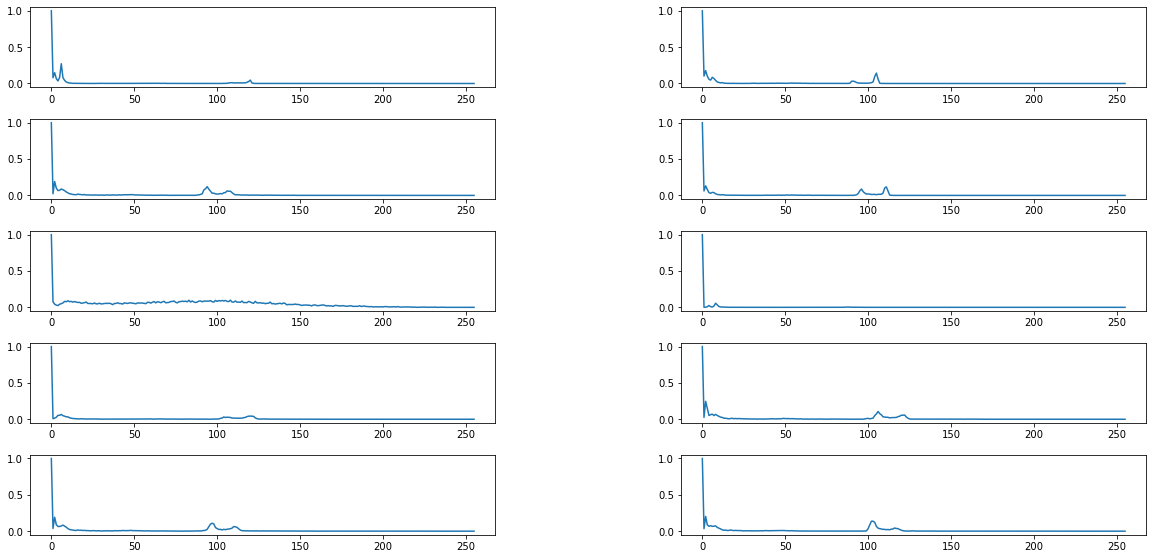

In [14]:
#Get cluster statistics
def printHistogramsCluster(histograms, n_images = 10):
        
        fig = plt.figure(figsize=(20,20))
        fig.subplots_adjust(hspace=0.4, wspace=0.4)

    
        for j in range(n_images):
            
            n = random.randint(0,len(histograms)-1)
            
            
            ax = fig.add_subplot(n_images, 2, j+1)
            ax.plot(histograms[n-1])

            
class_0_histograms = train_histograms[class_0_idx]
printHistogramsCluster(class_0_histograms)



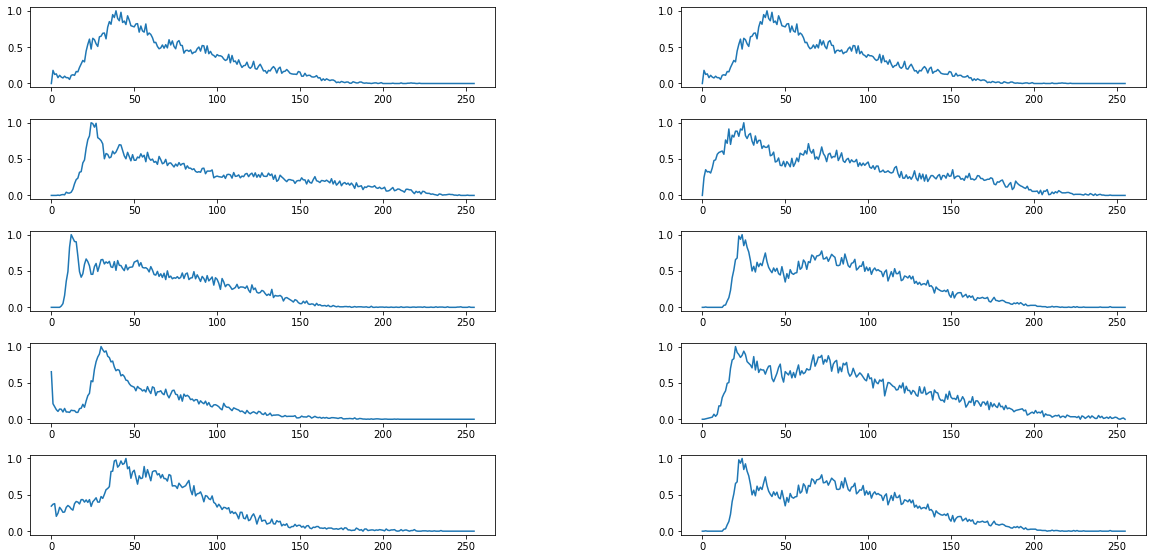

In [15]:
class_1_histograms = train_histograms[class_1_idx]
printHistogramsCluster(class_1_histograms)

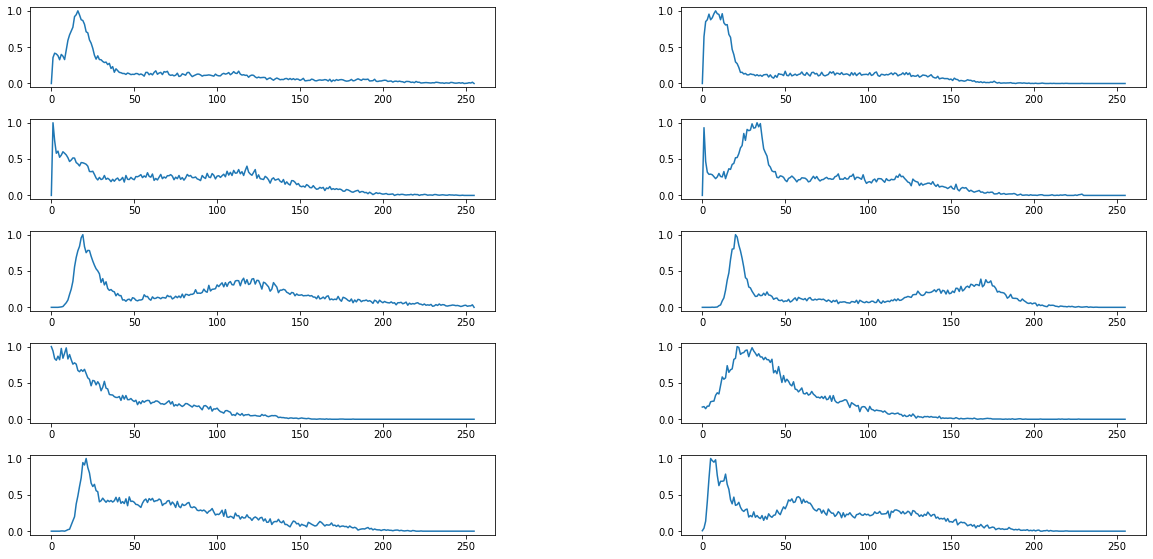

In [16]:
class_2_histograms = train_histograms[class_2_idx]
printHistogramsCluster(class_2_histograms)

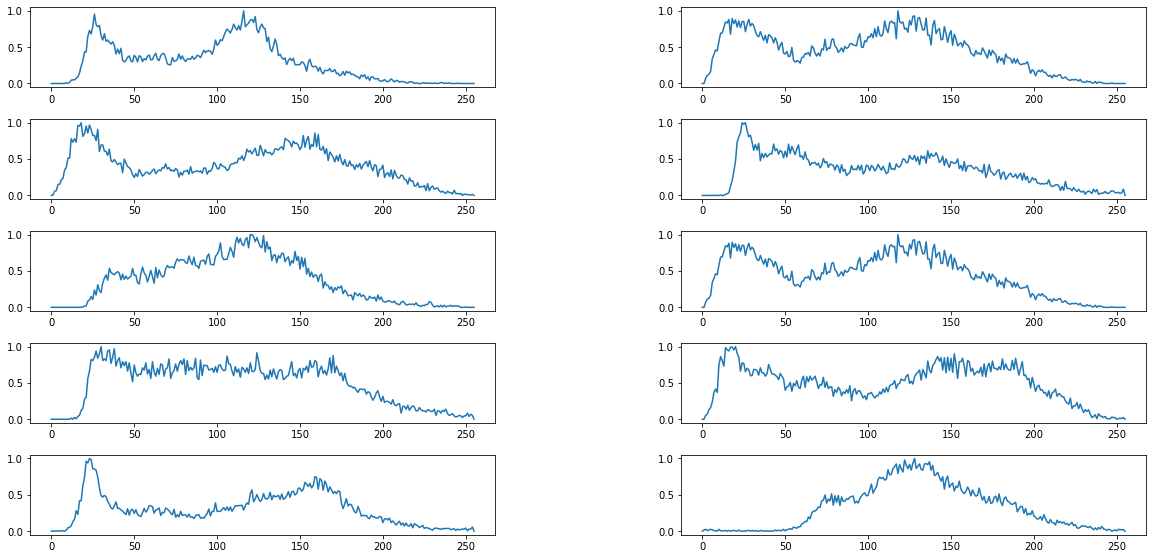

In [17]:
class_3_histograms = train_histograms[class_3_idx]
printHistogramsCluster(class_3_histograms)

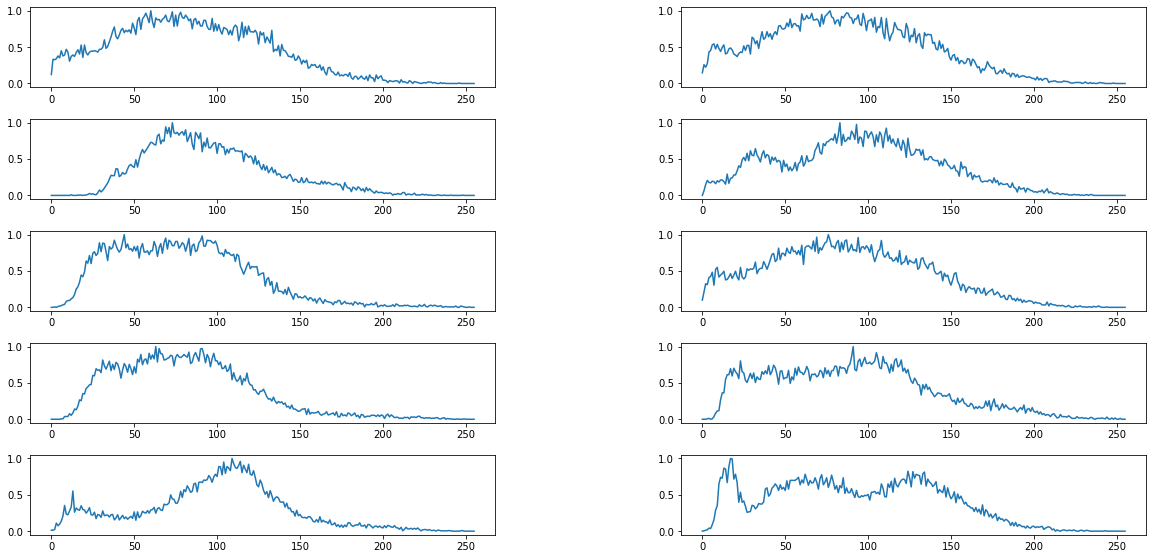

In [18]:
class_4_histograms = train_histograms[class_4_idx]
printHistogramsCluster(class_4_histograms)

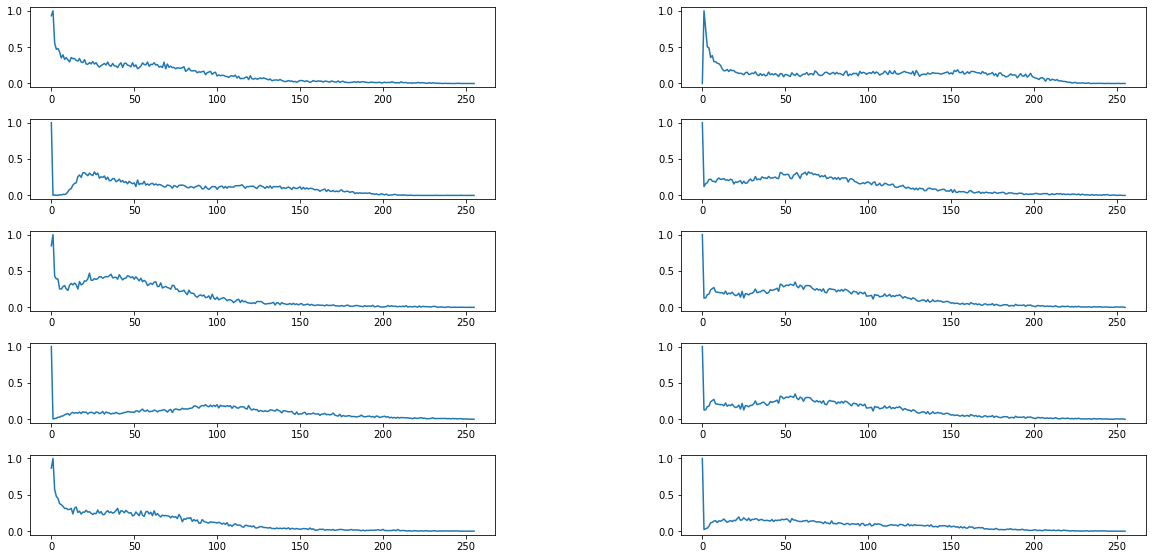

In [19]:
class_5_histograms = train_histograms[class_5_idx]
printHistogramsCluster(class_5_histograms)